In [2]:
import argparse
parser = argparse.ArgumentParser(prog = 'Run Model')
parser.add_argument('--WalkerID', type=int, choices=range(10000), default=0)
parser.add_argument('--uv_filepath', type=str, default='uv.npy')
parser.add_argument('--saving_location', type=str, default='')
parser.add_argument('--averages_fstring', type=str, default='averages_{}_float32.npy')
parser.add_argument('--BoxesPath', type=str, default="/amphora/bradley.greig/21CMMC_wTs_LC_RSDs_Nicolas/Programs/LightConeBoxes")
parser.add_argument('--ParametersPath', type=str, default="/amphora/bradley.greig/21CMMC_wTs_LC_RSDs_Nicolas/Programs/GridPositions")
inputs = parser.parse_args("--WalkerID 9999 --uv_filepath ../data/uv.npy --saving_location ../DatabaseTest --BoxesPath ../DatabaseTest --averages_fstring ../DatabaseTest/averages_{}_float32.npy".split(" "))

import numpy as np
import sys
import os
from src.py21cnn.database import DatabaseUtils
from src.py21cnn.formatting import Filters
import json

#define path to database, send to program as parameters if different from default
Redshifts = ['006.00060', '006.75589', '007.63960', '008.68274', '009.92624', '011.42503', \
            '013.25424', '015.51874', '018.36856', '022.02434', '026.82138', '033.28927', '034.50984']
Parameters = ["ZETA", "TVIR_MIN", "L_X", "NU_X_THRESH"]
database = DatabaseUtils.Database(Parameters, Redshifts, inputs.BoxesPath, inputs.ParametersPath)
deltaTmin = -250
deltaTmax = 50
Zmax = 30

In [3]:
print("loading lightcone")
Box = database.CombineBoxes(inputs.WalkerID)
print("removing large Z")
Box = Filters.RemoveLargeZ(Box, database, Z=Zmax)
print("removing NaNs")
np.nan_to_num(Box, copy=False, nan=deltaTmin, posinf=deltaTmax, neginf=deltaTmin)
print("clipping large values")
np.clip(Box, deltaTmin, deltaTmax, out=Box)

BoxAverage = np.load(inputs.averages_fstring.format(inputs.WalkerID))
print("removing large Z for average")
BoxAverage = Filters.RemoveLargeZ(BoxAverage, database, Z=Zmax)

Box -= BoxAverage

loading lightcone
removing large Z
removing NaNs
clipping large values
removing large Z for average


In [4]:
import tools21cm as t2c

In [5]:
t2c.const.set_hubble_h(0.678)
t2c.const.set_omega_matter(0.308)
t2c.const.set_omega_baryon(0.048425)
t2c.const.set_omega_lambda(0.692)
t2c.const.set_ns(0.968)
t2c.const.set_sigma_8(0.815)

In [6]:
d0 = t2c.cosmology.z_to_cdist(float(Redshifts[0]))

In [7]:
cdist = np.array(range(Box.shape[-1] + 1))*1.5 + d0 #adding one more redshit to the end
print(cdist)
redshifts = t2c.cosmology.cdist_to_z(cdist)
redshifts_mean = (redshifts[:-1] + redshifts[1:]) / 2
print(redshifts)
print(redshifts.shape)
print(redshifts_mean.shape)

[ 8444.84444096  8446.34444096  8447.84444096 ... 11602.34444096
 11603.84444096 11605.34444096]
[ 6.00059998  6.00409747  6.00759757 ... 29.93747605 29.96966299
 30.00189696]
(2108,)
(2107,)


In [11]:
finalBox = np.load(f"{inputs.saving_location}/lightcone_{inputs.WalkerID:04d}.npy")

In [12]:
finalBox.shape

(200, 200, 2107)

In [13]:
import matplotlib.pyplot as plt
import matplotlib

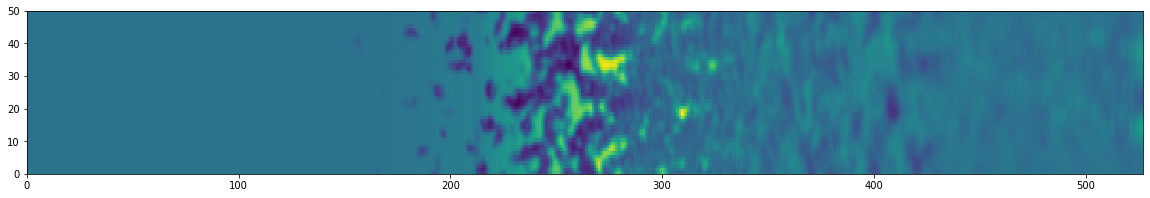

In [23]:
fig=plt.figure(figsize=(20, 3))
plt.pcolormesh(finalBox[10, ::4, ::4])
plt.show()

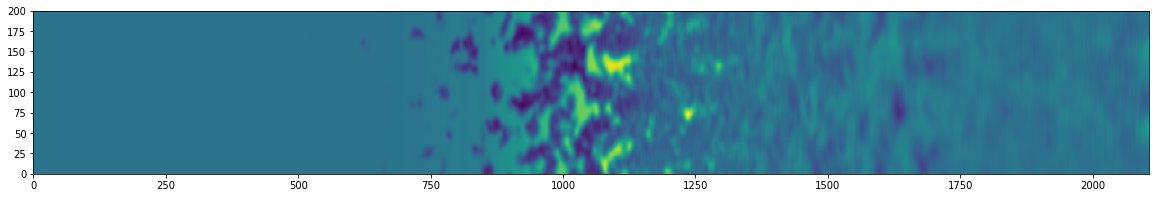

<Figure size 432x288 with 0 Axes>

In [24]:
fig=plt.figure(figsize=(20, 3))
plt.pcolormesh(finalBox[10])
plt.show()
plt.savefig('finalBox.pdf')

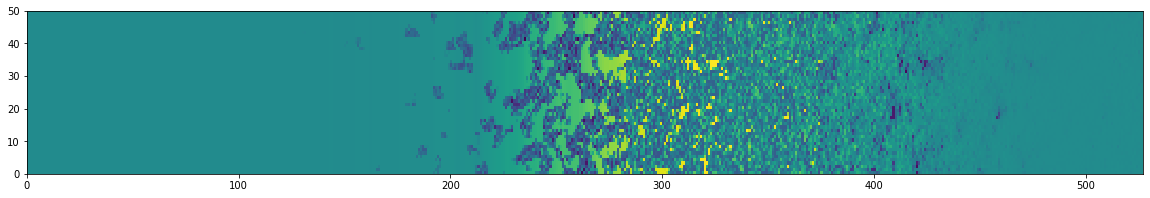

In [26]:
fig=plt.figure(figsize=(20, 3))
plt.pcolormesh(Box[10, ::4, ::4])
plt.show()
# plt.savefig('Box.pdf')